<IPython.core.display.Javascript object>


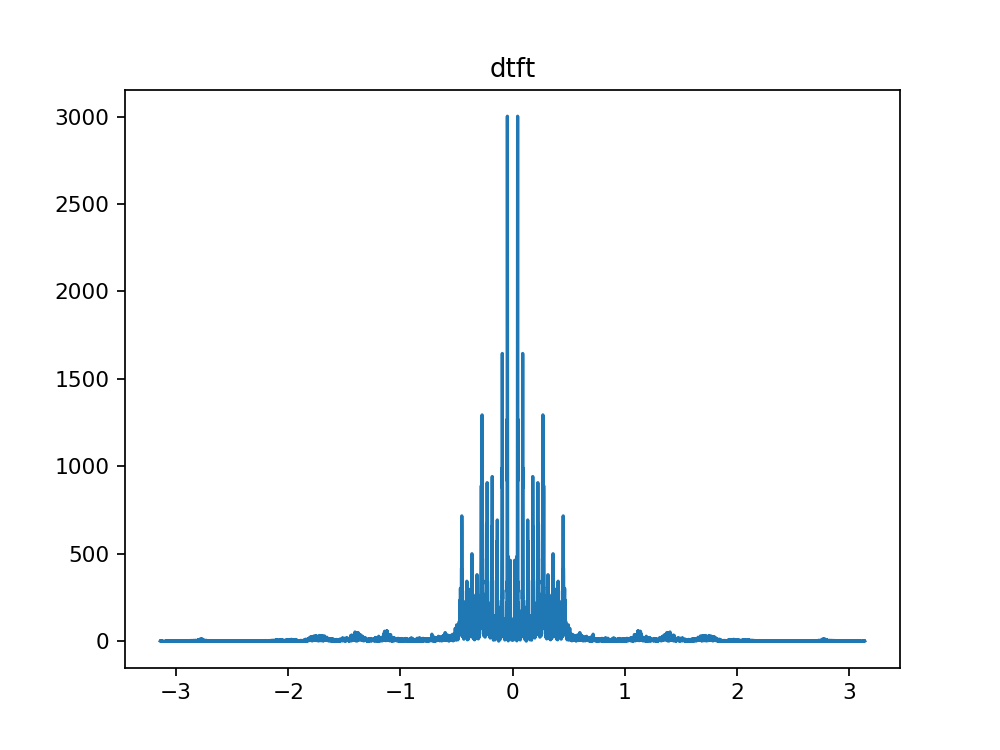

<IPython.core.display.Javascript object>


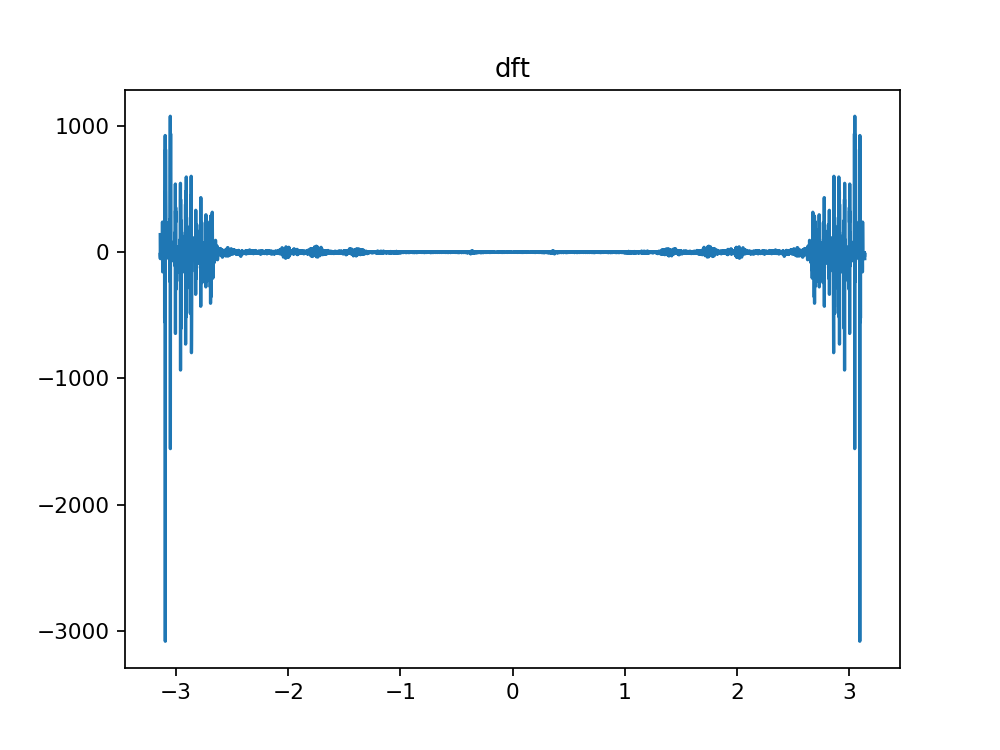

<IPython.core.display.Javascript object>


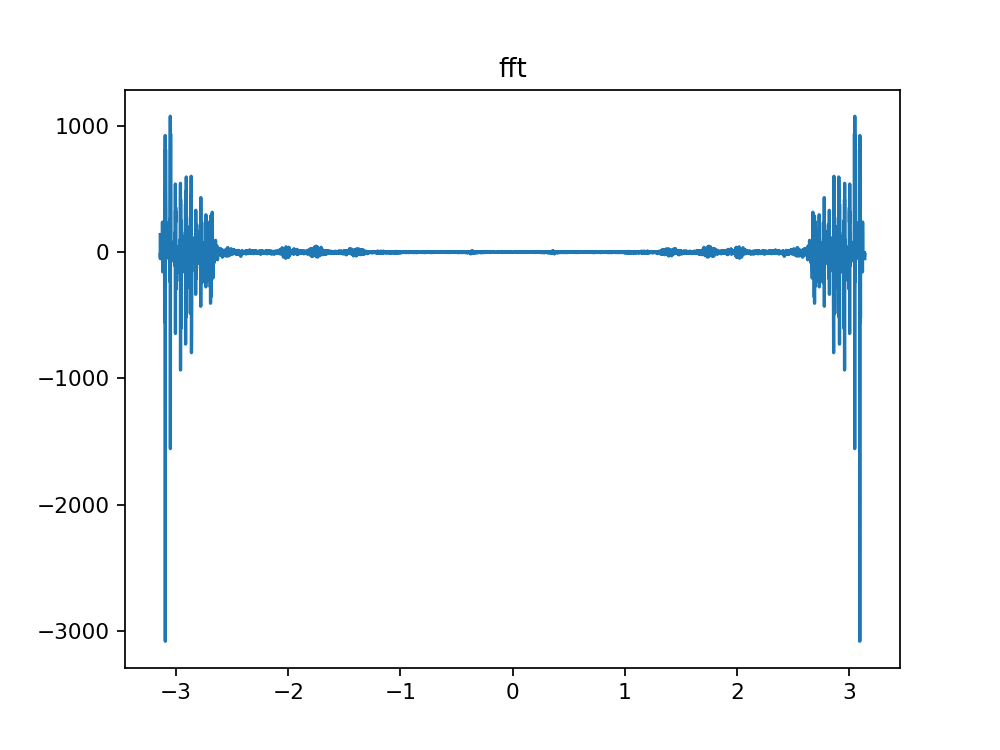

In [2]:
from cmath import exp, pi
import matplotlib.pyplot as plt
%matplotlib notebook
from numpy.fft import fftfreq
import numpy as np
import mpmath as mp
import math
import scipy
import scipy.stats as sp
import matplotlib.pyplot as plt
import subprocess
import cmath as cm
x=[]
y=[]

def dtft(x1,N):

    x=x1[0]
    j=cm.sqrt(-1)
    n=x1[1]
    X=[]

    w=np.linspace(-np.pi,np.pi,N)
    for i in range(0,N):
        w_tmp=w[i]
        X_tmp=0
        for k in range(0,len(x)):
            X_tmp+=(x[k]*np.exp(-n[k]*w_tmp*j))


        X.append(abs(X_tmp))
    #print("lenX:",len(X))
    return w,X

def dft(x,N):
    samples=[]
    for k in range(N):
        list=[]
        a=0
        for n in range(N):
            a=x[n]*cm.exp(-2j*cm.pi*k*n*(1/N))
            list.append(a)
            a=0
        summation=sum(list)
        samples.append(summation)
    #print("\nThe samples are:-\n[")  
    #for i in range(N):
    #    print(samples[i]," ")
    #print("]")
    return samples

def fft(x1):
    N = len(x1)
    if N <= 1: return x1
    even = fft(x1[0::2])
    odd =  fft(x1[1::2])
    T= [exp(-2j*pi*k/N)*odd[k] for k in range(N//2)]
    return [even[k] + T[k] for k in range(N//2)] + \
           [even[k] - T[k] for k in range(N//2)]

f = open("05010117_1a.norm", "r")
for line in f:
    x.append(float(line))
length=len(x)
#print("\nlen:",len(x))
lval=math.ceil(math.log(length,2))
Pval=2**(lval)
#print("\nPval=",Pval)
pad=Pval-len(x)
for i in range(pad):
    x.append(0.0)
#print("\nx:\n",x)
for i in range(Pval):
    y.append(i)
x1=[x,y]
w,X=dtft(x1,Pval)
#print("w\n",w)
absl=[]
samples=dft(x,Pval)
for iter in fft(x):
    absl.append(iter)
#absl.append("%5.3f" % abs(f) for f in fft(x))
#print("absl\n",absl)


plt.figure()
plt.title('dtft')
plt.plot(w,X)
plt.show()


plt.figure()
plt.title('dft')
plt.plot(w,samples,label='dft')

plt.figure()
plt.title('fft')
plt.plot(w,fft(x),label='fft')

plt.show()

In [3]:
for iter in fft(x):
    absl.append(iter)

if absl == samples:
    print("TRUE")
else:
    print("FALSE")

NameError: name 'samples' is not defined